# Manipulação de bitmaps (correlation)

In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from sarpy.datasets import load_nist

dataset = load_nist()
%load_ext autoreload
%autoreload 2

## Função de normalização dos bitmaps

In [2]:
from sarpy import extractContours
from scipy.misc import imresize
from math import *

#change this block for group 1 function
def normalizeImgs(data):
    shapes_cropped = []
    shapes_normalized = []

    for img in images:
        cc = extractContours.extract_contours(img)[0]
        smin = np.min(cc,axis=0)
        smax = np.max(cc,axis=0)
        xx = img[smin[1]:smax[1]+1,smin[2]:smax[2]+1]
        shapes_cropped.append(xx)

    a = np.asarray([0,0])
    for img in shapes_cropped:
        a = img.shape + a

    a = a/len(shapes_cropped) 
    for img in shapes_cropped:
        t = imresize(img,(floor(a[0]),floor(a[1])),'nearest','L')
        t = np.where(t > 0 , 1, 0)  
        shapes_normalized.append(t)
    return shapes_normalized

## Função auxiliar para exibir grid de imagens
- Função para visualizar grid de imagens

In [3]:
def gridVisualize(data):
    f = lambda arg1 : arg1;
    plt.rcParams["figure.figsize"] = (10,8)
    x = 8;
    y = int(np.floor(len(data)/x))
    fig = 0
    axes = 0
    if y <= 1:
        y = 1
        fig, axes = plt.subplots(1,x)
    else:
        fig, axes = plt.subplots(y+1,x)    
    k = 0
    for i in range(0,y+1):
        for j in range(0,x):
            if i*x+j < len(data):                
                if y <= 1:
                    axes[j].axis('off')
                    axes[j].imshow(f(data[k]),cmap='gray')
                else:
                    axes[i,j].axis('off')
                    axes[i,j].imshow(f(data[k]),cmap='gray')
                k = k + 1
            else:
                if y <=1 :
                    axes[j].axis('off')
                else:
                    axes[i,j].axis('off')                
    plt.show()

## Função para exibir o protótipo e a imagem em escala de cinza
function group 2

In [4]:
def getMeanImage(data, threshold):
    mean_array = np.mean(data,axis=0)
    img_mean = np.zeros((len(mean_array),len(mean_array[0])))
    img_gray = np.zeros((len(mean_array),len(mean_array[0])))

    for idx in range(len(mean_array)):
        for idy in range(len(mean_array[0])):
            img_gray[idx][idy] = mean_array[idx][idy] * 255;
            if(mean_array[idx][idy] > threshold):
                img_mean[idx][idy] = 1;

#     print("Gray Scale")
#     plt.imshow(img_gray,cmap='gray')
#     plt.axis('off')
#     plt.show()
    return img_mean
    


## Processando imagens


*******
**
  Images for label 0 
**
*******
Threshold bitmap equal to  0.2


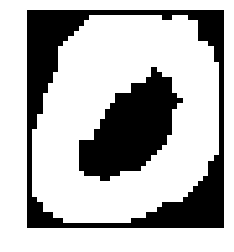

Threshold bitmap equal to  0.4


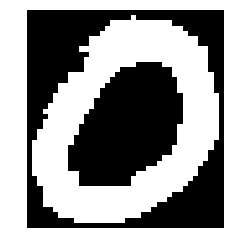

Threshold bitmap equal to  0.6000000000000001


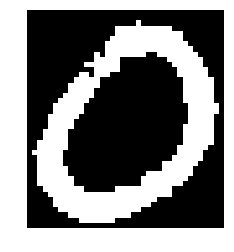

Threshold bitmap equal to  0.8


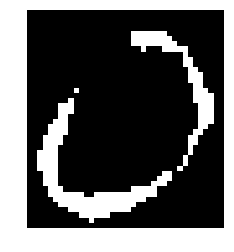


*******
**
  Images for label F 
**
*******
Threshold bitmap equal to  0.2


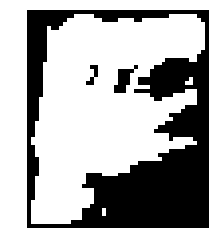

Threshold bitmap equal to  0.4


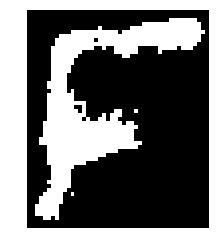

Threshold bitmap equal to  0.6000000000000001


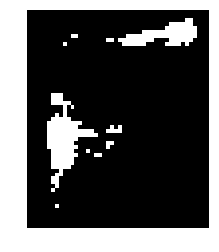

Threshold bitmap equal to  0.8


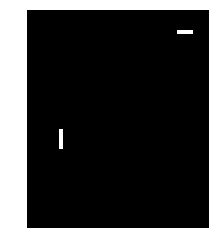


*******
**
  Images for label U 
**
*******
Threshold bitmap equal to  0.2


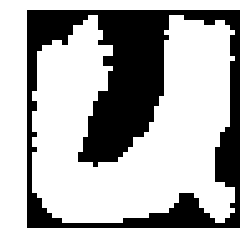

Threshold bitmap equal to  0.4


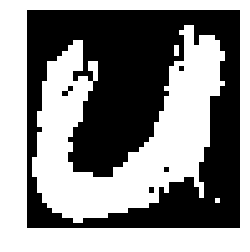

Threshold bitmap equal to  0.6000000000000001


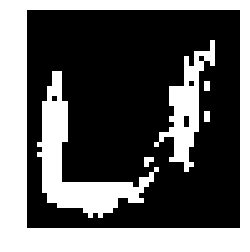

Threshold bitmap equal to  0.8


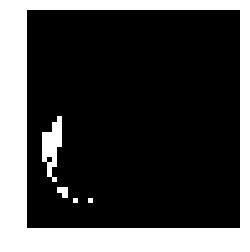


*******
**
  Images for label j 
**
*******
Threshold bitmap equal to  0.2


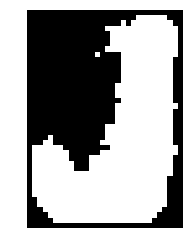

Threshold bitmap equal to  0.4


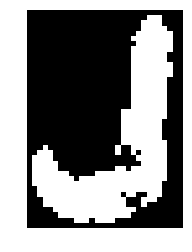

Threshold bitmap equal to  0.6000000000000001


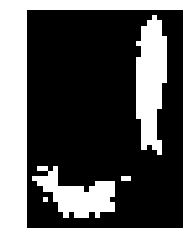

Threshold bitmap equal to  0.8


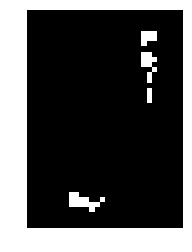


*******
**
  Images for label y 
**
*******
Threshold bitmap equal to  0.2


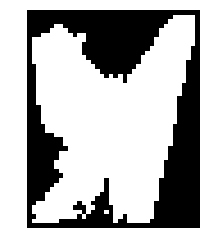

Threshold bitmap equal to  0.4


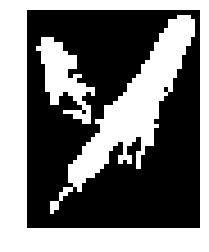

Threshold bitmap equal to  0.6000000000000001


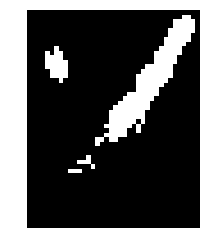

Threshold bitmap equal to  0.8


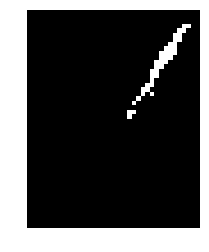

In [5]:
"""
#
# Example para imagens aleatórias 
#
"""    
for c in range(0,62,15):
    images = [];
    for i in range(c*100,c*100+18):
        images.append(dataset['bitmaps'][i])    
    
    print("\n*******\n**\n  Images for label", dataset['names'][dataset['targets'][c*100]],"\n**\n*******")
    
    normalized = normalizeImgs(images)
    
    thr = 0.2
    while (thr < 1):
        print("Threshold bitmap equal to ",thr)
        mean_img = getMeanImage(normalized,thr)
        plt.imshow(mean_img,cmap='gray')
        plt.axis('off')
        plt.show()   
        thr = thr + 0.2
    
    
